In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [ ]:
data=pd.read_csv('Test.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
features_na=[feature for feature in data.columns if data[feature].isnull().sum()>=1]

In [ ]:
features_num=[feature for feature in data.columns if data[feature].dtype!='O']

In [ ]:
discrete_variables=[feature for feature in features_num if len(data[feature].unique())<25]

In [ ]:
continuous_variables=[feature for feature in features_num if feature not in discrete_variables and feature not in['Loan_ID ']] 

In [ ]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

In [ ]:
data['Gender'].replace('Male',0,inplace=True)
data['Gender'].replace('Female',1,inplace=True)
data['Married'].replace('No',0,inplace=True)
data['Married'].replace('Yes',1,inplace=True)
data['Education'].replace('Not Graduate',0,inplace=True)
data['Education'].replace('Graduate',1,inplace=True)
data['Self_Employed'].replace('No',0,inplace=True)
data['Self_Employed'].replace('Yes',1,inplace=True)
data['Dependents'].replace('3+',3,inplace=True)
data['Property_Area'].replace('Urban',0,inplace=True)
data['Property_Area'].replace('Rural',1,inplace=True)
data['Property_Area'].replace('Semiurban',2,inplace=True)


In [ ]:
def replace_cat_feat(data,features_cat_na):
  dataset=data.copy()
  for feature in features_cat_na:
    dataset[features_cat_na]=dataset[features_cat_na].fillna(dataset[feature].mode()[0])

  
  return dataset

In [ ]:
features_cat_na=[feature for feature in features_na if feature in categorical_features]

In [ ]:
data=replace_cat_feat(data,features_cat_na)

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
num_feature=[feature for feature in features_na if feature in features_num]

In [ ]:
data[num_feature].drop(['Credit_History'],axis=1)

,LoanAmount,Loan_Amount_Term
0,110.0,360.0
1,126.0,360.0
2,208.0,360.0
3,100.0,360.0
4,78.0,360.0
...,...,...
362,113.0,360.0
363,115.0,360.0
364,126.0,360.0
365,158.0,360.0


In [ ]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [ ]:
for feature in num_feature:
  median_values=data[feature].median()
  data[feature].fillna(median_values,inplace=True)

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
data['ApplicantIncome'].replace(0,data['ApplicantIncome'].median(),inplace=True)
 
 

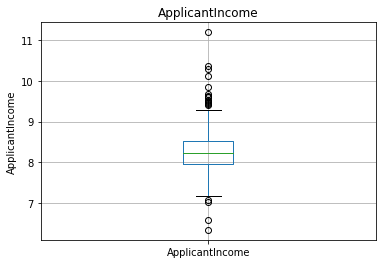

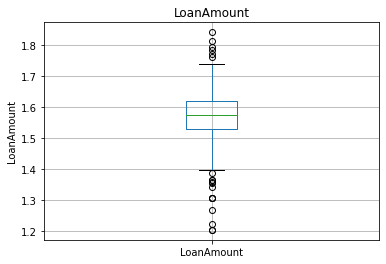

In [ ]:
for feature in data[continuous_variables]:
     if 0 in data[feature].unique():
       pass
     else:
       data[feature]=np.log(data[feature])
       data.boxplot(column=feature)
       plt.ylabel(feature)
       plt.title(feature)
       plt.show()

   

In [ ]:
data['total_income']=data['ApplicantIncome']+data['CoapplicantIncome']
data['EMI']=(data['LoanAmount']*0.09*(1.09**data['Loan_Amount_Term']))/(1.09**(data['Loan_Amount_Term']-1))

In [ ]:
data.to_csv('X_test.csv',index=False)